In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
data = pd.read_csv('Credit.csv')
data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
data.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [4]:
data.Education.unique()

array([11, 15, 16, 10, 12,  9, 13, 19, 14,  7, 17,  8,  5, 20, 18,  6],
      dtype=int64)

In [5]:
data.drop([data.columns[0],'Gender','Married','Ethnicity'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Student      400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 25.1+ KB


In [7]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Balance
0,14.891,3606,283,2,34,11,No,333
1,106.025,6645,483,3,82,15,Yes,903
2,104.593,7075,514,4,71,11,No,580
3,148.924,9504,681,3,36,11,No,964
4,55.882,4897,357,2,68,16,No,331


C:\Users\JH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


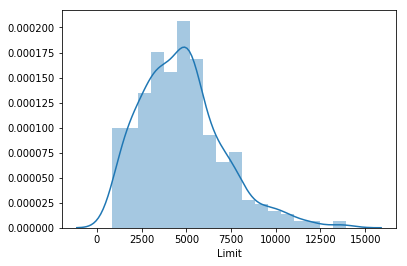

In [8]:
sns.distplot(data.Limit)

In [9]:
data.Student,student_name = pd.factorize(data.Student)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Student      400 non-null int64
Balance      400 non-null int64
dtypes: float64(1), int64(7)
memory usage: 25.1 KB


In [11]:
data.Student = data.Student.astype('category')
data.Education = data.Education.astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null category
Student      400 non-null category
Balance      400 non-null int64
dtypes: category(2), float64(1), int64(5)
memory usage: 20.5 KB


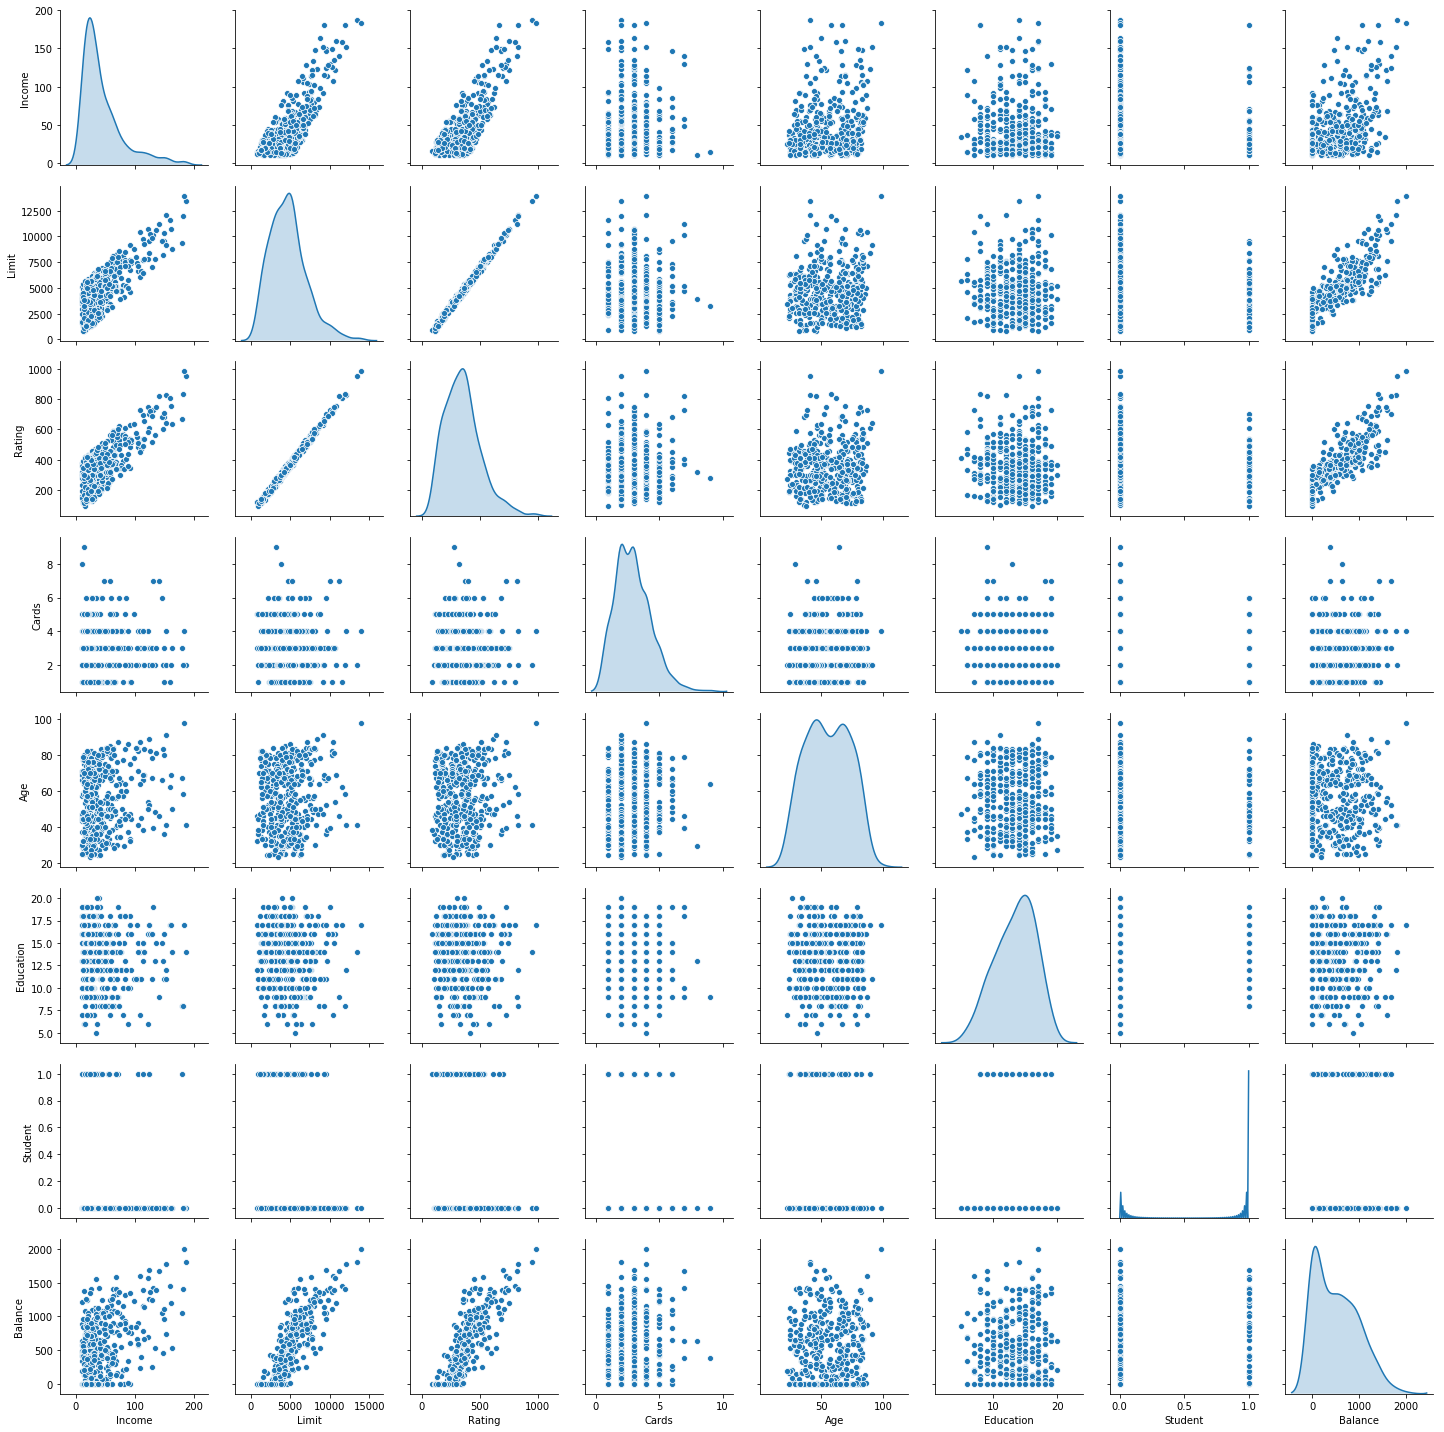

In [13]:
import seaborn as sns
sns.pairplot(data,diag_kind='kde');

In [14]:
sc = StandardScaler()
X = sc.fit_transform(data.drop(['Education','Student'],axis=1))

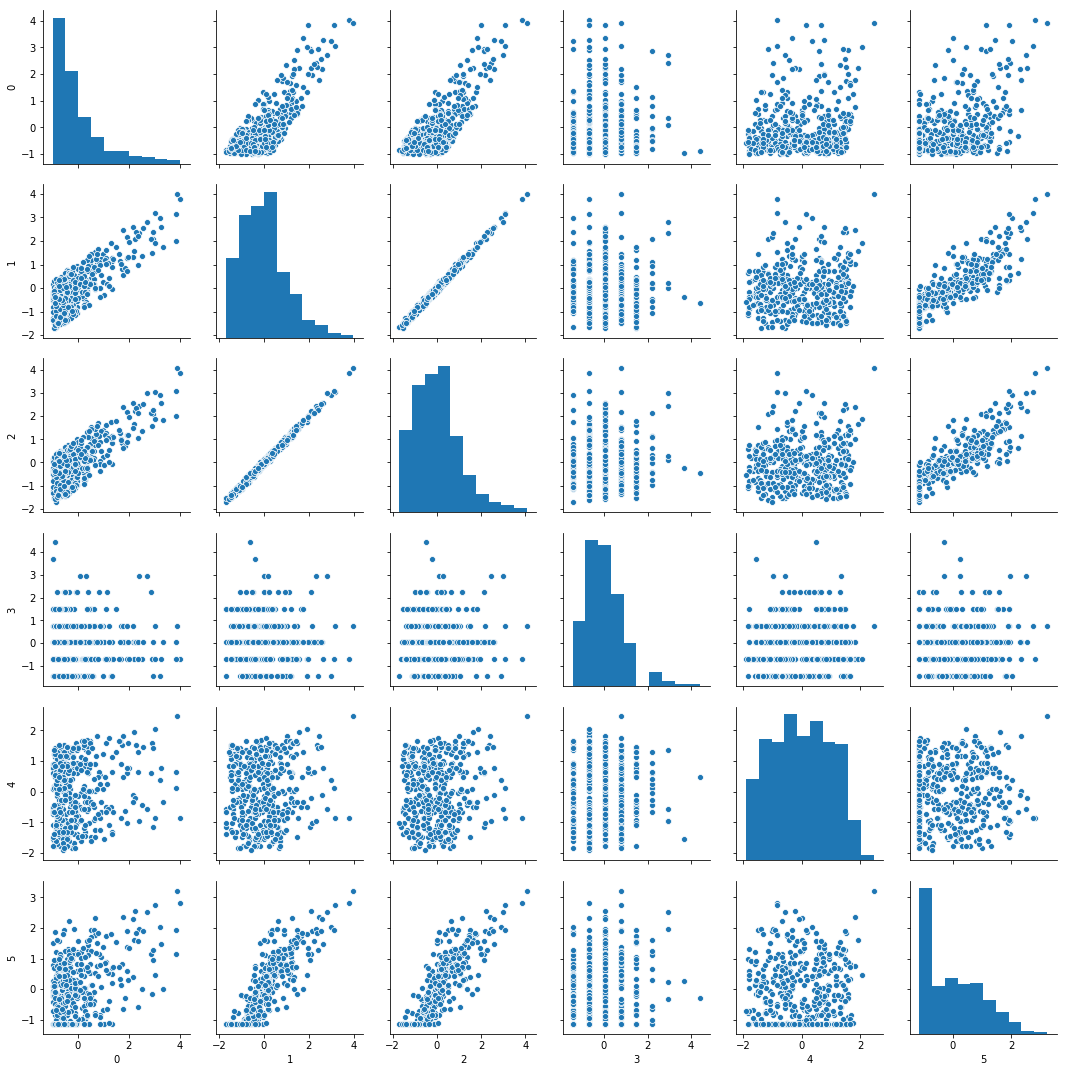

In [15]:
sns.pairplot(pd.DataFrame(X));

In [16]:
pca = PCA()
x_pca = pca.fit_transform(X)

In [17]:
clusterer = KMeans(n_clusters=2)

In [18]:
data['group'] = clusterer.fit_predict(x_pca)

In [19]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Balance,group
0,14.891,3606,283,2,34,11,0,333,1
1,106.025,6645,483,3,82,15,1,903,0
2,104.593,7075,514,4,71,11,0,580,0
3,148.924,9504,681,3,36,11,0,964,0
4,55.882,4897,357,2,68,16,0,331,1


C:\Users\JH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\JH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


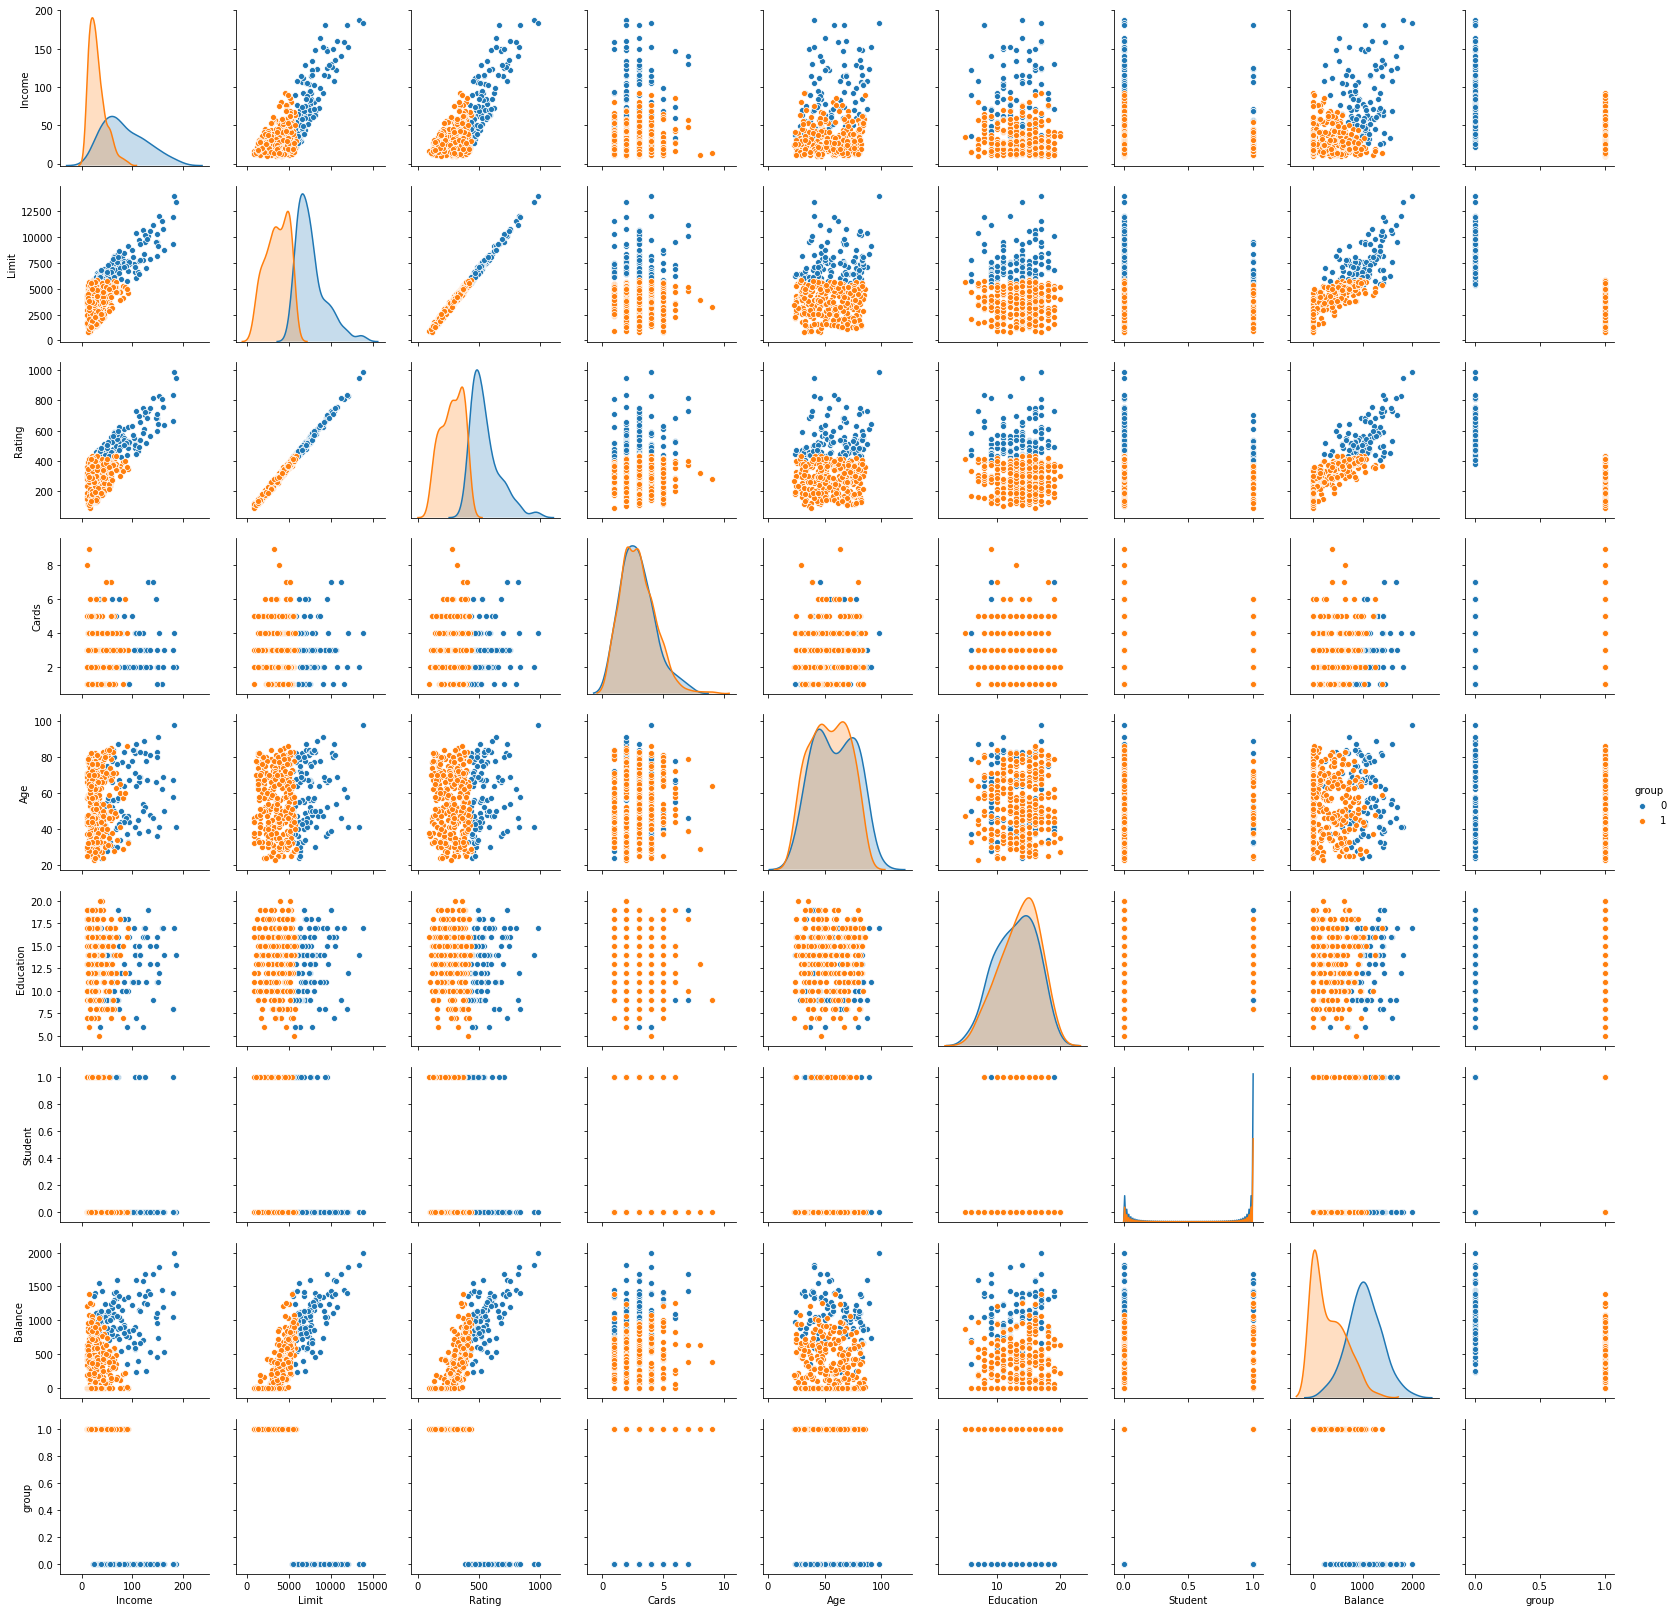

In [20]:
sns.pairplot(data,hue='group');

silhoutte coef for 2 clusters is 0.5317098274227544


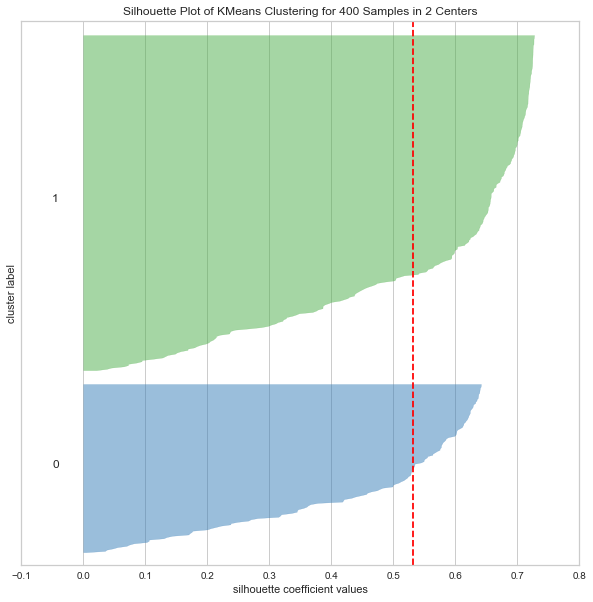

silhoutte coef for 3 clusters is 0.5462289948543753


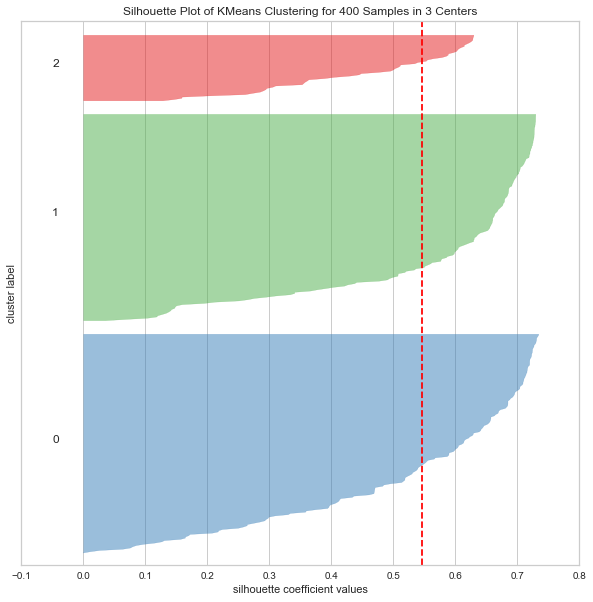

silhoutte coef for 4 clusters is 0.539372823720878


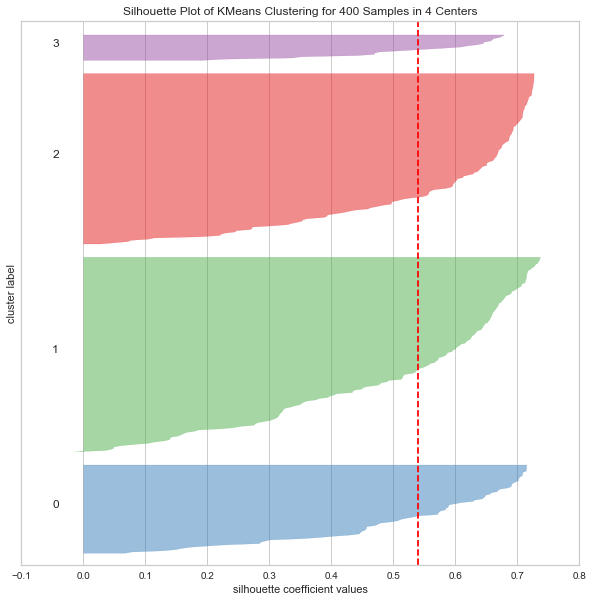

silhoutte coef for 5 clusters is 0.5286941320598653


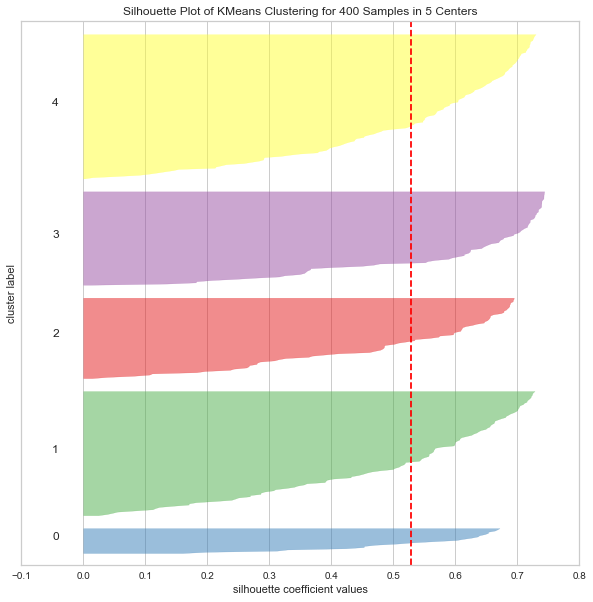

silhoutte coef for 6 clusters is 0.4912402258957376


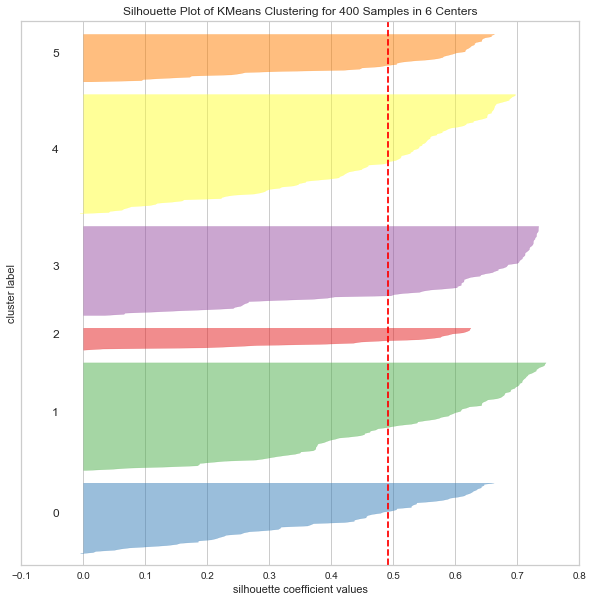

silhoutte coef for 7 clusters is 0.48788836989204015


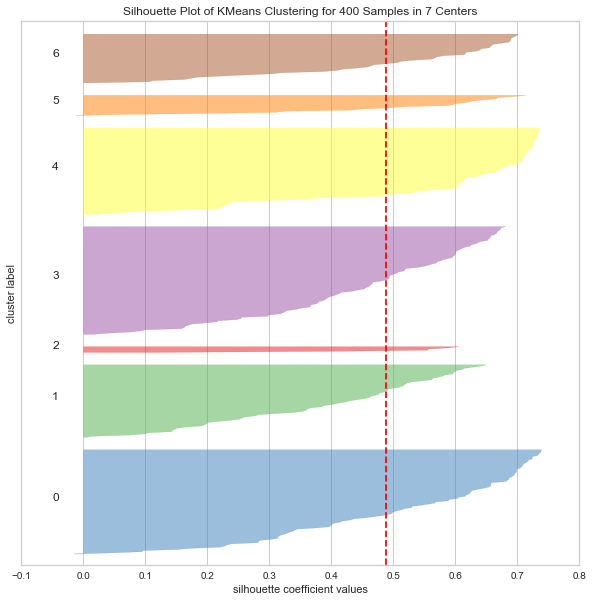

silhoutte coef for 8 clusters is 0.4763401173738087


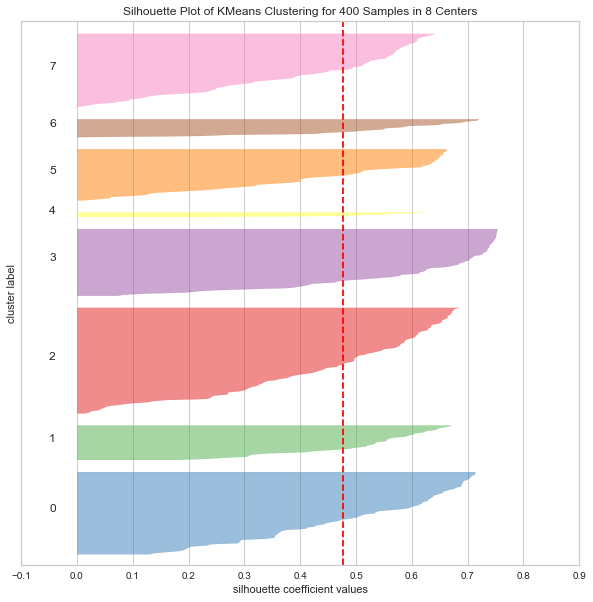

silhoutte coef for 9 clusters is 0.46084892052165793


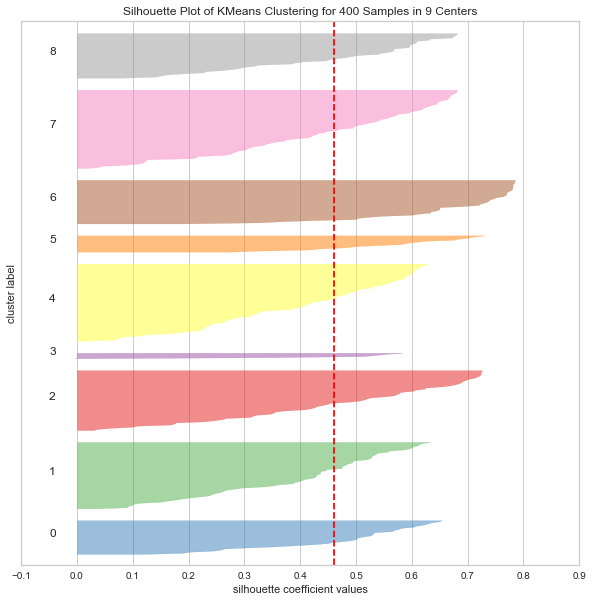

silhoutte coef for 10 clusters is 0.4556951578851918


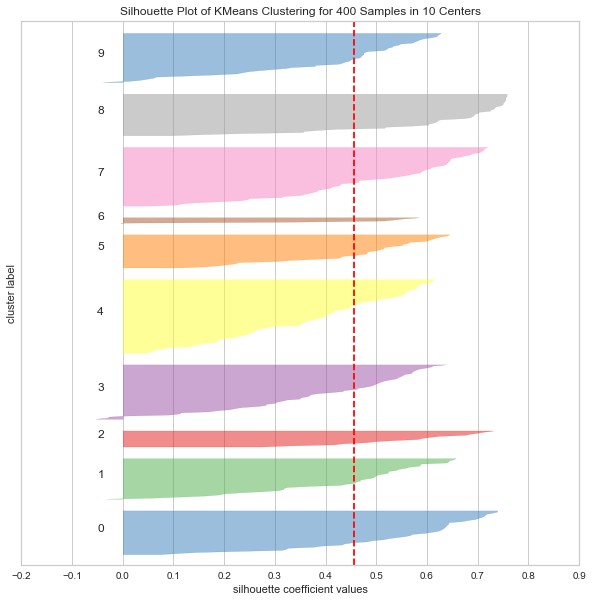

In [21]:

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
ab = data
error = []
for i in range(2,11):
    mdl = KMeans(n_clusters=i,random_state=42)
    a = mdl.fit_predict(data)
    error.append(mdl.inertia_)
    ab['k_'+str(i)] = a
    # Instantiate the clustering model and visualizer
    print('silhoutte coef for {} clusters is {}'.format(i,silhouette_score(data, ab['k_'+str(i)])))
    visualizer = SilhouetteVisualizer(mdl)
    fig = plt.figure(figsize=(10,10))
    visualizer.fit(data) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

In [22]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Balance,group,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,k_10
0,14.891,3606,283,2,34,11,0,333,1,1,1,2,1,1,0,7,7,3
1,106.025,6645,483,3,82,15,1,903,0,0,0,0,2,0,1,5,8,1
2,104.593,7075,514,4,71,11,0,580,0,0,0,0,2,5,6,5,8,1
3,148.924,9504,681,3,36,11,0,964,0,0,2,3,0,2,5,6,5,2
4,55.882,4897,357,2,68,16,0,331,1,1,0,1,4,4,3,2,1,4


In [23]:
data.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Student',
       'Balance', 'group', 'k_2', 'k_3', 'k_4', 'k_5', 'k_6', 'k_7', 'k_8',
       'k_9', 'k_10'],
      dtype='object')

C:\Users\JH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\JH\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


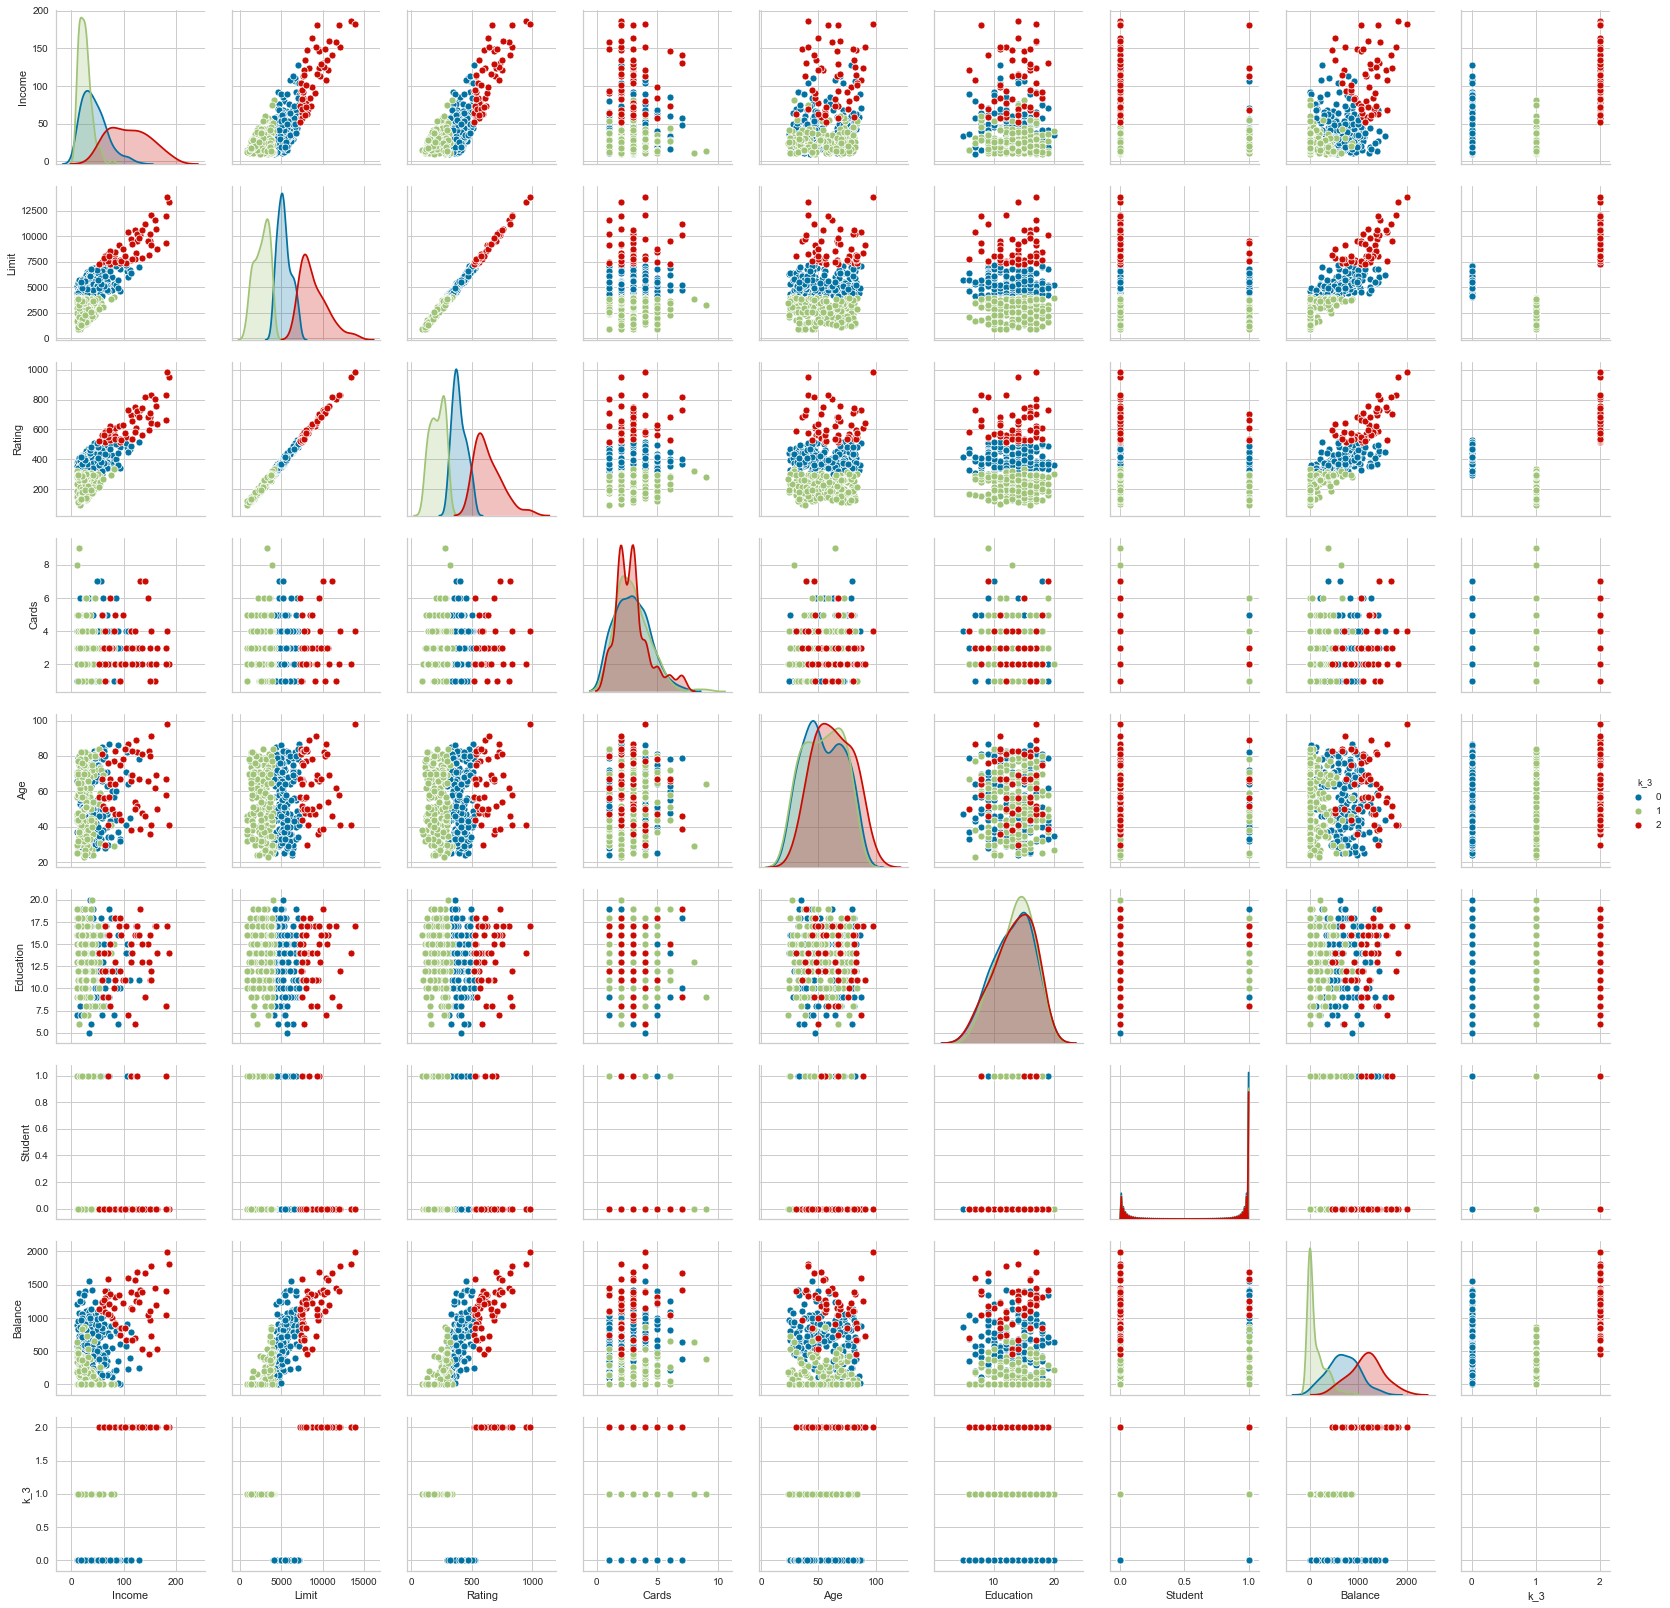

In [24]:
sns.pairplot(data.iloc[:,0:11].drop(['group','k_2'],axis=1),hue='k_3')

In [25]:
df = data.iloc[:,0:11].drop(['group','k_2'],axis=1)

<Figure size 720x1440 with 0 Axes>

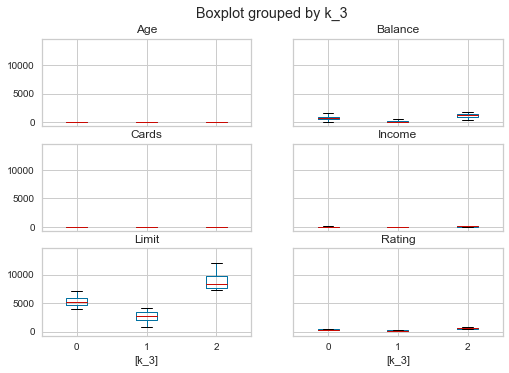

In [26]:
fig = plt.figure(figsize=(10,20))
df.boxplot(by='k_3');

In [27]:
df

,Income,Limit,Rating,Cards,Age,Education,Student,Balance,k_3
0,14.891,3606,283,2,34,11,0,333,1
1,106.025,6645,483,3,82,15,1,903,0
2,104.593,7075,514,4,71,11,0,580,0
3,148.924,9504,681,3,36,11,0,964,2
4,55.882,4897,357,2,68,16,0,331,0
5,80.180,8047,569,4,77,10,0,1151,2
6,20.996,3388,259,2,37,12,0,203,1
7,71.408,7114,512,2,87,9,0,872,0
8,15.125,3300,266,5,66,13,0,279,1
9,71.061,6819,491,3,41,19,1,1350,0


In [28]:
group_dic = {0:'Customer with medium limit',1:'Customer with low limit',2:'Customer with high limit'}

In [29]:
df.k_3 = df.k_3.map(group_dic)

In [30]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Balance,k_3
0,14.891,3606,283,2,34,11,0,333,Customer with low limit
1,106.025,6645,483,3,82,15,1,903,Customer with medium limit
2,104.593,7075,514,4,71,11,0,580,Customer with medium limit
3,148.924,9504,681,3,36,11,0,964,Customer with high limit
4,55.882,4897,357,2,68,16,0,331,Customer with medium limit


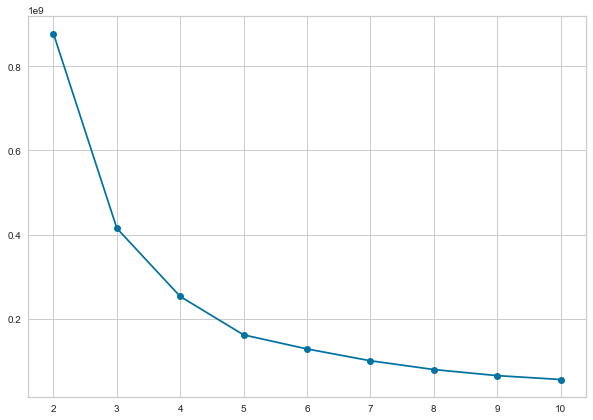

In [31]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(2,11),error,marker='o');

In [32]:
df2 = pd.concat([data.iloc[:,0:8],data['k_4'],data['k_5']],axis=1)

In [33]:
error[2]-error[3]

91253915.4739691

In [34]:
error[3]-error[4]

33396549.5912935

In [35]:
error[4]-error[5]

28075463.42303036

In [36]:
error[5]-error[6]

20872258.892106473

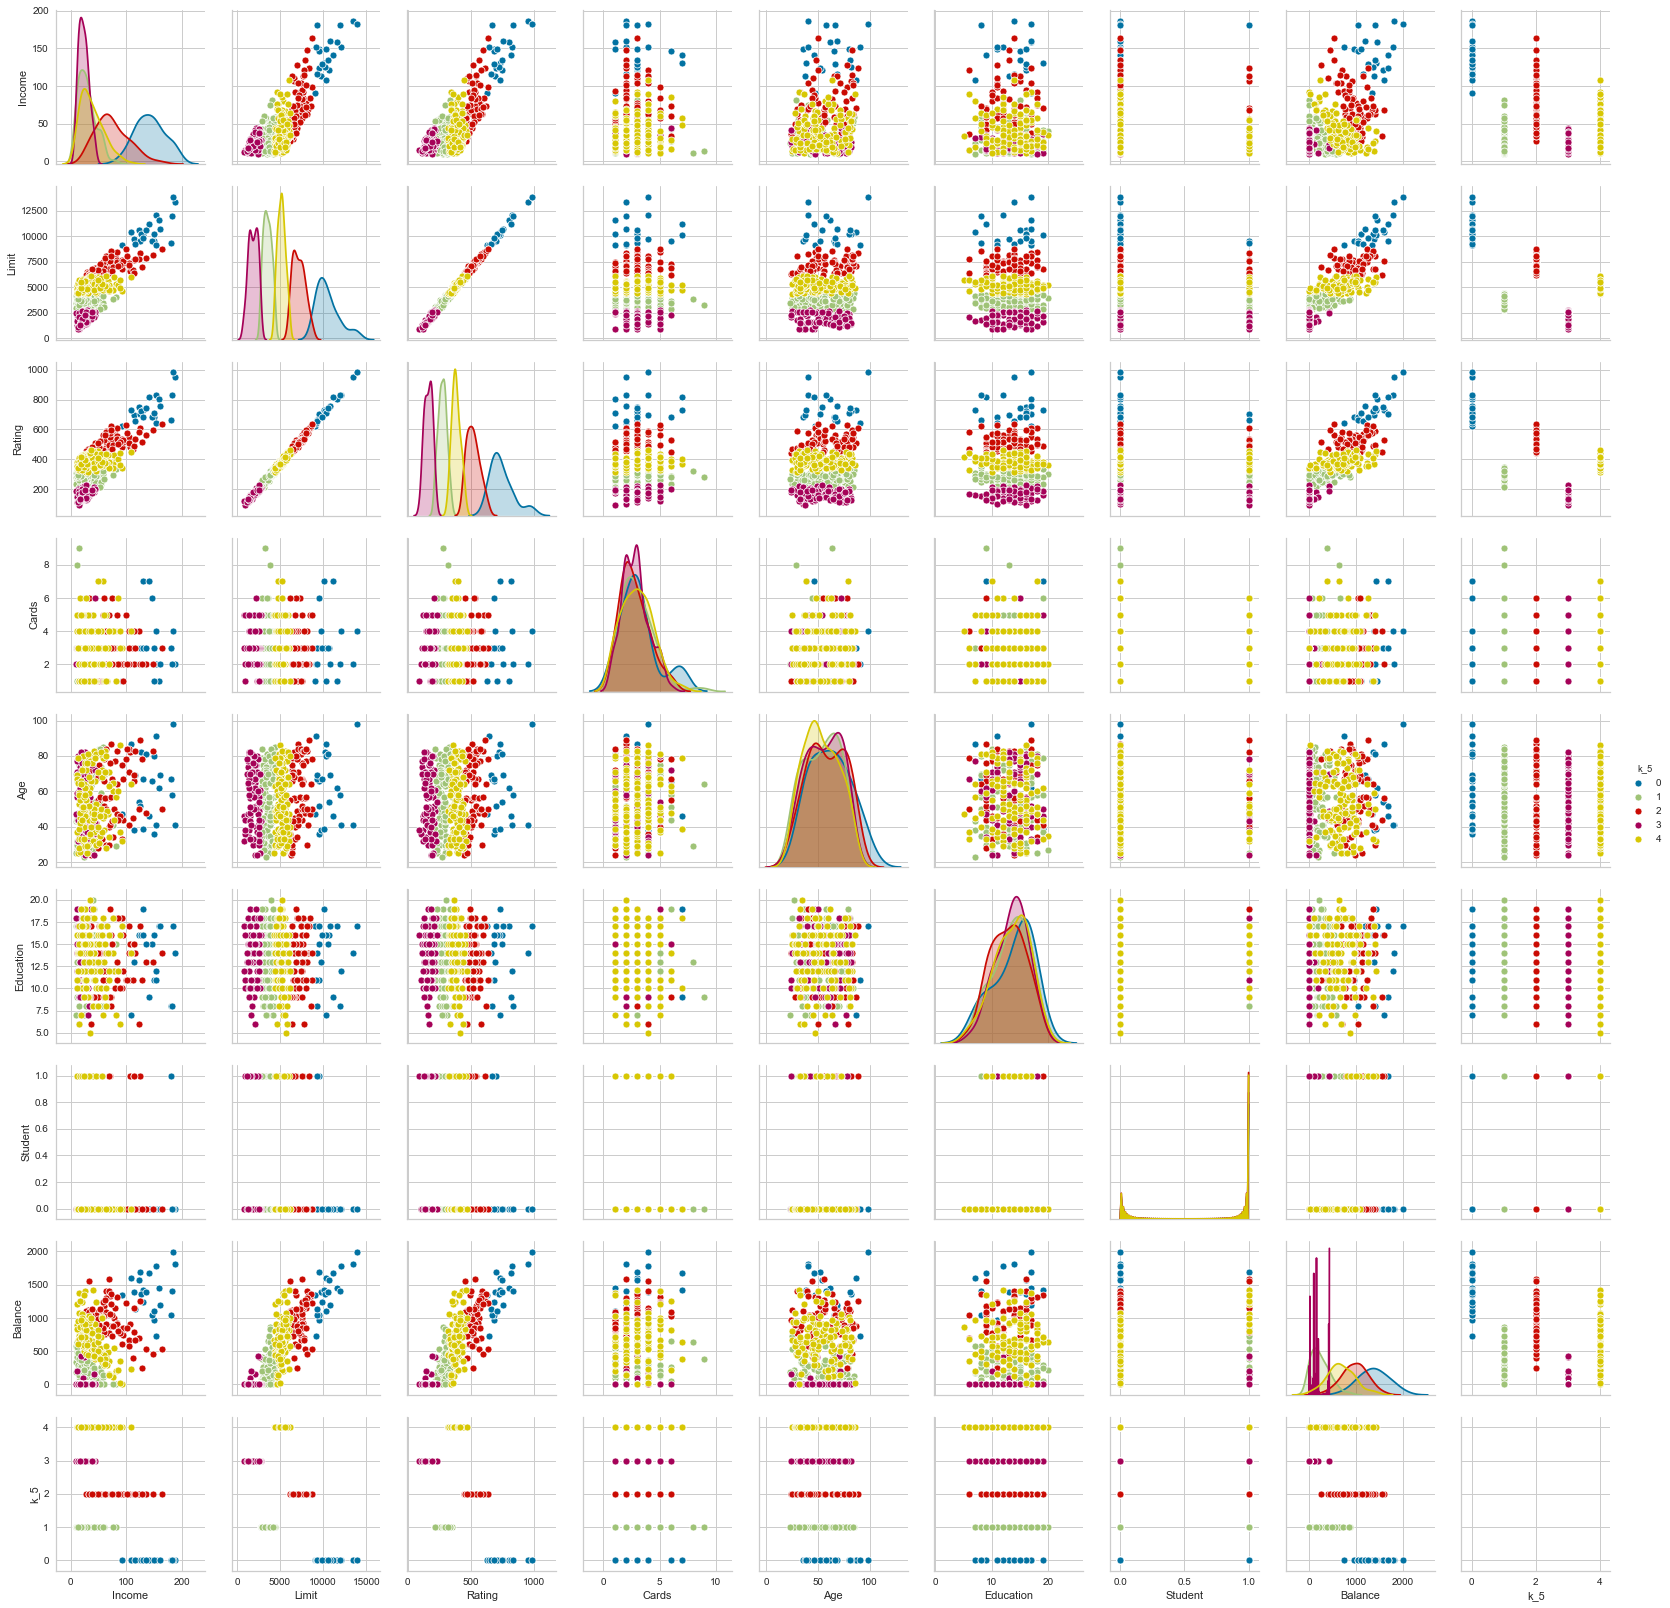

In [37]:
sns.pairplot(df2.drop('k_4',axis=1),hue='k_5',diag_kind='kde');

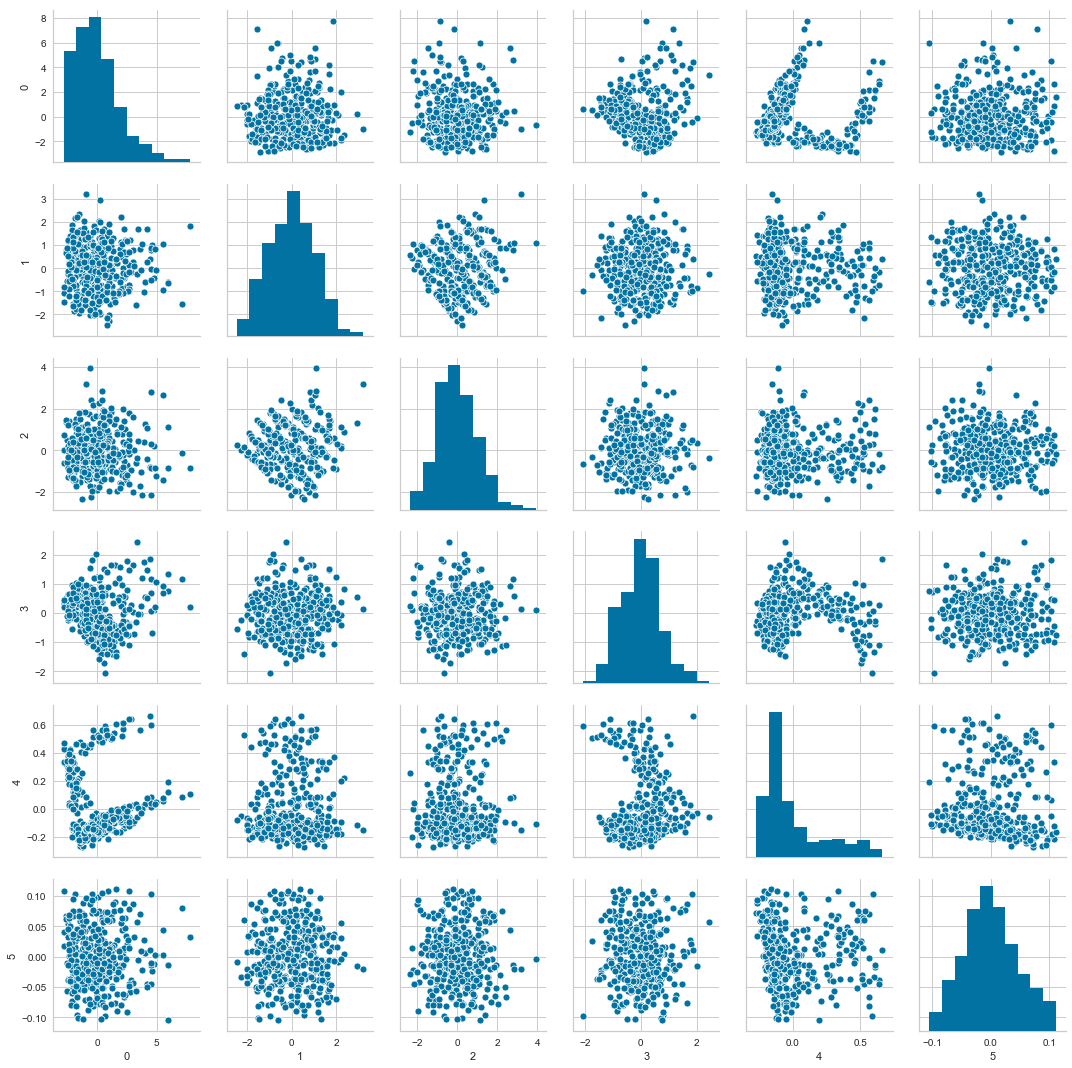

In [38]:
sns.pairplot(pd.DataFrame(x_pca));